In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
# from matplotlib.animation import FuncAnimation

In [23]:
# Laplacian matrix
Del2 = np.array([[0.05, 0.2, 0.05], [0.2, -1, 0.2], [0.05, 0.2, 0.05]])

# Parameters

# Diffusion rates
Da = 1.0
Db = 0.5

f = 0.055       # feed rate
k = 0.062       # kill rate

dt = 1          # Delta t between iterations
n = 1500        # Total number of iterations

# Initializing grid with concentrations A and B
x = 100
y = 100
A = np.ones((x, y))
B_no_seed = np.zeros((x, y))

In [24]:
def convolve(X, Y, Del2):
    """
    Performs 2D convolution, or calculates the Laplacian to give the difference between the average values of the neighbouring cells and the current cell, to calculate diffusion

    Parameters:
    X 		:   Initial A grid (2x2)
    Y 		:   Initial B grid (2x2)
    Del2	:	Laplacian matrix (3x3)

    Returns convolved A and B matrices
    """

    X_conv = signal.convolve2d(X, Del2, mode='same')
    Y_conv = signal.convolve2d(Y, Del2, mode='same')

    return X_conv, Y_conv

In [25]:
def seeding(X, x_start, y_start, width, depth):
    """
    Seeds the specified area of a matrix X with a value (currently 1)

    Parameters:
    X 		:	2x2 matrix to be seeded
    x_start	:	Starting x value in the matrix to be seeded
    y_start :	Starting y value in the matrix to be seeded
    width	:	Width of the seeded area
    depth 	:	Depth of the seeded area

    Returns the seeded matrix
    """

    x_end = x_start + width
    y_end = y_start + depth
    X[x_start:x_end, y_start:y_end] = 1

    return X

In [26]:
# Seeding coordinates
startx = 40
starty = 40
w = 20
d = 20

for i in range(len(startx)):
    B = seeding(B_no_seed, startx[i], starty[i], widths[i], depths[i])
    B_no_seed = B

In [27]:
def reaction_diffusion(X, Y, dtime, kill, feed, Dx, Dy):
    """
    Implements the reaction-diffusion equation according to the tutorial here: https://www.karlsims.com/rd.html. This is also the function used for the animation

    Parameters:
    dtime	:	time increments 
    kill	: 	kill rate in the simulation
    feed	:	feed rate in the simulation
    Dx 		: 	diffusion rate of A
    Dy		:	diffusion rate of B

    Returns the updated array at every iteration of the animation
    """

    X_conv, Y_conv = convolve(X, Y, Del2)
    X_new = X + (Dx*X_conv - X*Y**2 + feed*(1 - X))*dtime
    Y_new = Y + (Dy*Y_conv + X*Y**2 - (kill + feed)*Y)*dtime
    X = X_new
    Y = Y_new

    return X, Y

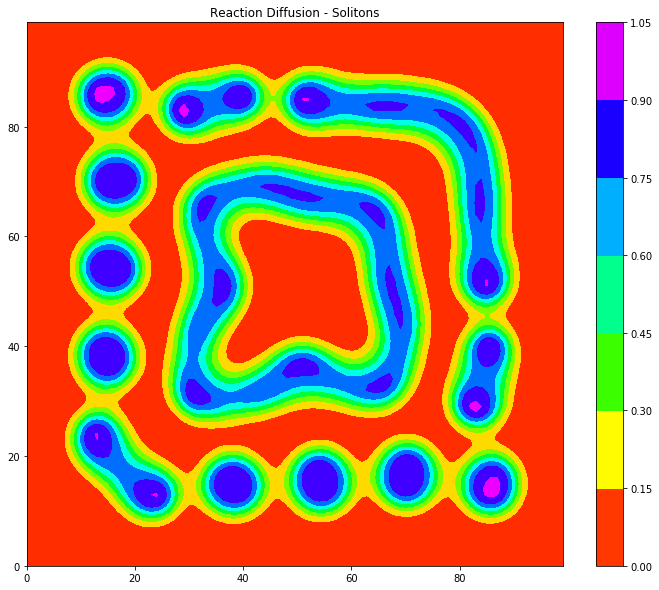

In [28]:
# Plotting over the iterations

# Initializing plot
plt.subplots(figsize=(12, 10))
cmap = 'viridis'
plt.contourf(B, cmap=cmap)
plt.title("Reaction Diffusion")
plt.colorbar()

for t in range(n):
    A, B = reaction_diffusion(A, B, dt, k, f, Da, Db)
    plt.contourf(B, cmap=cmap)
    if t%10 == 0:
        plt.savefig(f'reac-diff-{t}.png')